In [finding slopes](finding_slopes), we found the line the did the best job of predicting one vector of values from another vector of values.

Our line was a slope and an intercept.  We used it to predict the Overall
Quality scores (`quality`) for courses, from the Easiness scores (`easiness`).

We chose the line to minimize the average prediction errors, and the sum of squared prediction errors.

Now we may have another question.  Can we believe the slope?   Put more
formally, is it possible that there is in fact no underlying positive or
negative slope relating  Easiness and Quality, and the slope that we found
arose because of *sampling error*.  That is, there was some random fluctuation
in the data, from course to course, and just by chance, the random fluctuation
resulted in the slope we observe.

This is a very similar problem to the problem of comparing means between two groups.  Like that problem, we can get at our question using a permutation test.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')
# Print to 4 decimal places, show tiny values as 0
np.set_printoptions(precision=4, suppress=True)
import pandas as pd

If you are running on your laptop, you will need to download the
[disciplines_SI.xlsx]({{ site.baseurl }}/data/disciplines_SI.xlsx) file to the
same directory as this notebook.

We read the data and get the columns:

In [2]:
# Read the Excel format data file
ratings = pd.read_excel('disciplines_SI.xlsx')
# Convert Easiness and Overall Quality measures to arrays.
easiness = np.array(ratings['Easiness'])
quality = np.array(ratings['Overall Quality'])

The [using minimize](using_minimize) page has the function we want to minimize:

In [3]:
def ss_any_line(c_s, x_values, y_values):
    c, s = c_s
    predicted = c + x_values * s
    error = y_values - predicted
    return np.sum(error ** 2)

Find the best intercept and slope:

In [4]:
from scipy.optimize import minimize
observed_result = minimize(ss_any_line, [2.25, 0.47], args=(easiness, quality))
observed_slope = observed_result.x[1]
observed_slope

0.5088633619994262

This is what we see, in the data we have.

What would we see, if we took another random sample of Easiness and Quality values?  We can't easily do this.  Is there a way we can estimate what this would look like?

We return to the permutation trick we used in [Brexit ages](../05/brexit_ages).
If there is, in fact, no relationship between Quality and Easiness, then the
slope, suggesting an association of Quality and Easiness, is just a result of
random sampling.

We can simulate that random sampling by making a new, fake (Easiness, Quality) pairing.  We do this by shuffling the Quality (or Easiness) values, to make the relationship between them random.

Then we check what slope we get.

We keep doing this, and keep checking the slope, to build up the *sampling distribution* for the slope.

Then we compare our actual slope to the sampling distribution.  If the actual slope is not a rare value from the sampling distribution, the slope may have come about because of random sampling.  If it is a rare value, random sampling is an unlikely explanation.

In [5]:
# Make a copy of the quality values
shuffled_quality = quality.copy()

Now shuffle the copy of the Quality values, to make a fake and random pairing between the Easiness and Quality values.

In [6]:
# Make a fake pairing of Easiness and Quality, by shuffling Quality
np.random.shuffle(shuffled_quality)

Use `minimize` to estimate the best-fit slope for this new fake pairing:

In [7]:
# Estimate the slope for the fake pairing
fake_result = minimize(ss_any_line, [2.25, 0.47],
                       args=(easiness, shuffled_quality))
fake_result.x

array([3.2478, 0.1532])

Get the slope, as our first estimate from the sampling distribution:

In [8]:
fake_slope = fake_result.x[1]
fake_slope

0.15322158103009292

We need to do this many times to build up a good estimate of the sampling distribution:

In [9]:
n_samples = 10000
fake_slopes = np.zeros(n_samples)
for i in np.arange(n_samples):
    np.random.shuffle(shuffled_quality)
    fake_inter, fake_slope = minimize(ss_any_line, [2.25, 0.47],
                                      args=(easiness, shuffled_quality)).x
    fake_slopes[i] = fake_slope

As usual, we display the sampling distribution:

Text(0.5, 1.0, 'Sampling distribution for slope')

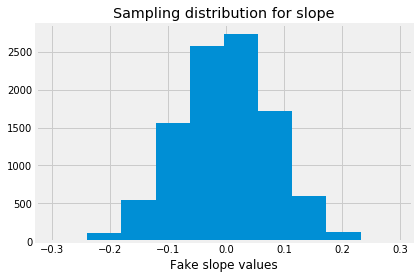

In [10]:
plt.hist(fake_slopes)
plt.xlabel('Fake slope values')
plt.title('Sampling distribution for slope')

We find the proportion of the sampling distribution that is greater than or
equal to the value we saw:

In [11]:
p = np.count_nonzero(fake_slopes >= observed_slope) / n_samples
p

0.0

The observed slope is very unlikely, given the sampling distribution.  We conclude that the observed slope is unlikely to be the result of random sampling.